In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 분석

In [3]:
plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
df = pd.read_csv('data/unmatch_data1.csv',encoding='euc-kr').drop(columns=['Unnamed: 0'])
df.head()

,location,year,month,lon,lat,height,avg_tem,precip,wind,min_tem,hPa,sun,g_tem,start,climax
0,속초,1989,1,128.5647,38.2509,17.53,1.5,165.9,2.8,-1.5,1023.7,111.6,0.8,286,297
1,속초,1989,2,128.5647,38.2509,17.53,2.7,65.3,2.6,-0.5,1022.4,154.2,1.9,286,297
2,속초,1989,3,128.5647,38.2509,17.53,5.9,121.7,3.2,2.6,1017.0,175.4,6.1,286,297
3,속초,1989,4,128.5647,38.2509,17.53,12.4,6.2,3.2,7.5,1013.3,228.1,14.2,286,297
4,속초,1989,5,128.5647,38.2509,17.53,16.5,66.8,3.5,12.5,1010.6,253.7,18.7,286,297


In [23]:
cond = (df.month == 9) & (df.location == '추풍령')
# 서울, 속초,보은,대전,전주,대구,목포,부산

test = df[cond].drop(columns=['wind'])

C:\Java\miniconda3\envs\.py39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\LG PC\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


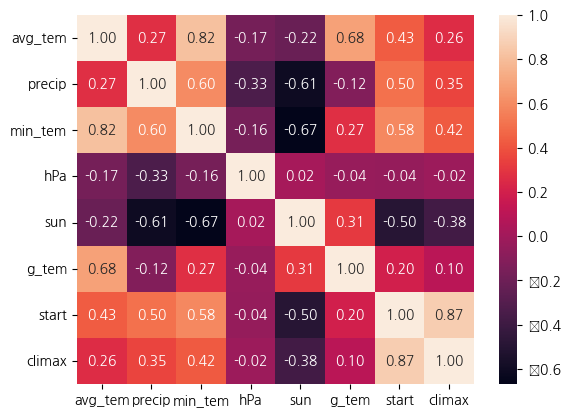

In [25]:
sns.heatmap(test.iloc[:,6:].corr(),annot=True, fmt='.2f')
plt.show()

In [26]:
model = ols('climax~avg_tem+min_tem+precip',data=test).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 climax   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1.637
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.214
Time:                        17:14:47   Log-Likelihood:                -66.619
No. Observations:                  23   AIC:                             141.2
Df Residuals:                      19   BIC:                             145.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    292.5103     26.916     10.868      0.0

In [434]:
df[df.month == 9].location.value_counts()

인천     33
전주     32
대전     32
안동     32
창원     32
       ..
순천      4
고창      4
대관령     4
홍성      4
고창군     2
Name: location, Length: 80, dtype: int64

In [408]:
cond = ((df.location == '제천') | (df.location == '고산') | (df.location == '순천') | (df.location == '양평') | (df.location == '구미') | (df.location == '보은')\
        | (df.location == '대관령') | (df.location == '금산') | (df.location == '봉화') | (df.location == '영주') | (df.location == '북춘천') | (df.location == '홍천'))\
        & (df.month == 9)

df[cond].location.value_counts()

구미     23
보은     19
양평     17
금산     17
홍천     16
봉화     16
제천     14
영주     14
고산     12
북춘천     5
대관령     4
순천      4
Name: location, dtype: int64

In [428]:
lo = ['제천','고산','순천','양평','구미','보은', '대관령' , '금산','봉화','영주','북춘천','홍천']
lo_count = [14,12,4,17,23,19,4,17,16,14,5,16]

In [429]:
r2_sco, sqrt = [],[]

for i in range(len(lo)):
    cond = (df.month == 9) & (df.location == f'{lo[i]}')
    # 서울, 속초,보은,대전,전주,대구,목포,부산

    test = df[cond].drop(columns=['wind'])

    LR = LinearRegression()


    X = test.iloc[:,[6]]
    y = test.iloc[:,[13]]

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # LR.fit(X_train,y_train)

    # pred = LR.predict(X_test)
    
    # # r2_sco.append(r2_score(pred, y_test))
    # sqrt.append(np.sqrt(mean_squared_error(pred, y_test)))
    LR.fit(X,y)
    r2_sco.append(LR.score(X,y))

    # print(LR.coef_,LR.intercept_)
    # print(r2_score(pred, y_test),np.sqrt(mean_squared_error(pred, y_test)))
dc = pd.DataFrame({'location':lo,'r2_sco':r2_sco,'lo_count':lo_count})
dc

In [ ]:
print(np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [9, 13]

In [ ]:
# model = ols('climax~avg_tem+precip+wind+min_tem+hPa+sun+g_tem',data=df2).fit()
# print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 climax   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     3.415
Date:                Thu, 08 Dec 2022   Prob (F-statistic):             0.0218
Time:                        18:05:23   Log-Likelihood:                -63.967
No. Observations:                  23   AIC:                             143.9
Df Residuals:                      15   BIC:                             153.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2153.1795   1281.314      1.680      0.1

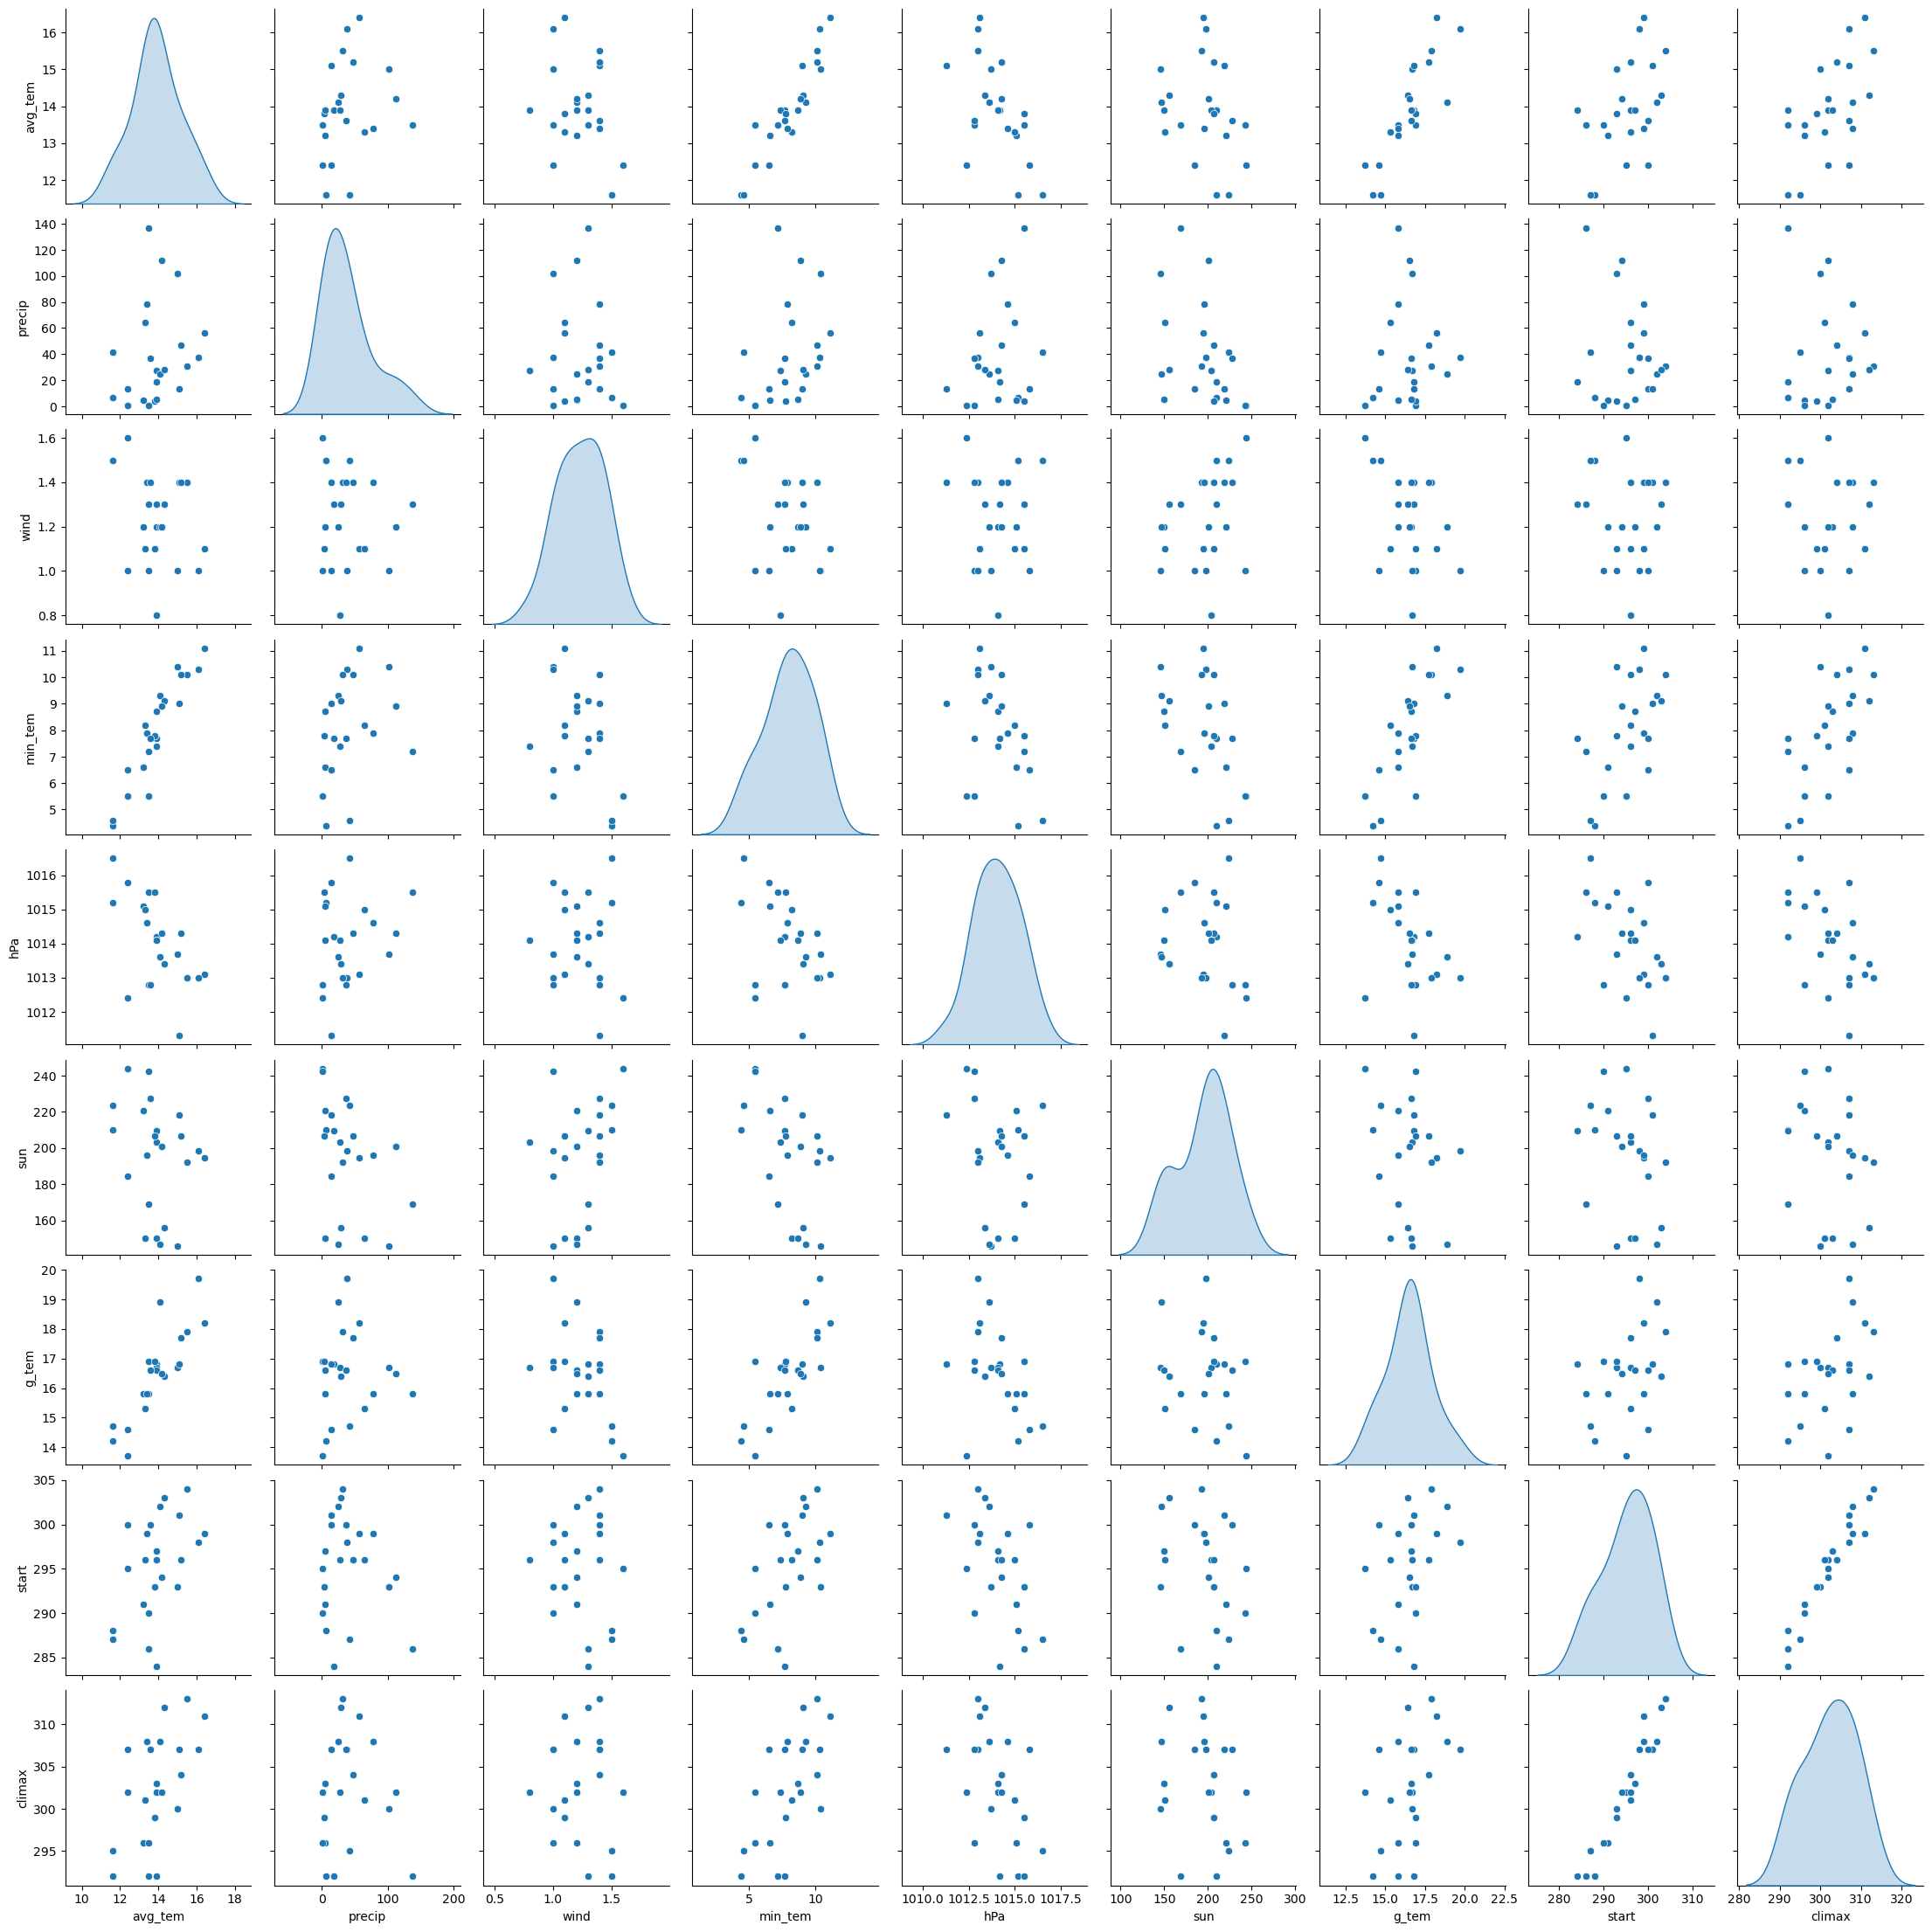

In [ ]:
# sns.pairplot(df2.iloc[:,6:],diag_kind='kde')
# plt.show()

In [ ]:
# year30 = ['인천','전주','포항','대전','안동','창원','서울','청주','울산','목포']

In [ ]:
# area2 = (df.location == '인천') & (df.month == 9)
# area3 = (df.location == '전주') & (df.month == 9)
# area4 = (df.location == '포항') & (df.month == 9)
# area5 = (df.location == '대전') & (df.month == 9)
# area6 = (df.location == '안동') & (df.month == 9)
# area7 = (df.location == '창원') & (df.month == 9)
# area8 = (df.location == '서울') & (df.month == 9)
# area9 = (df.location == '청주') & (df.month == 9)
# area10 = (df.location == '울산') & (df.month == 9)
# area11 = (df.location == '목포') & (df.month == 9)

In [ ]:
# inchon = df[area2].drop(columns=[ 'month', 'lon', 'lat', 'height', 'avg_tem','precip', 'wind', 'min_tem', 'hPa', 'sun', 'g_tem'])
# jeonju = df[area3].drop(columns=[ 'month', 'lon', 'lat', 'height', 'avg_tem','precip', 'wind', 'min_tem', 'hPa', 'sun', 'g_tem'])
# pohang = df[area4].drop(columns=[ 'month', 'lon', 'lat', 'height', 'avg_tem','precip', 'wind', 'min_tem', 'hPa', 'sun', 'g_tem'])
# daejeon = df[area5].drop(columns=[ 'month', 'lon', 'lat', 'height', 'avg_tem','precip', 'wind', 'min_tem', 'hPa', 'sun', 'g_tem'])
# andong = df[area6].drop(columns=[ 'month', 'lon', 'lat', 'height', 'avg_tem','precip', 'wind', 'min_tem', 'hPa', 'sun', 'g_tem'])
# changwon = df[area7].drop(columns=[ 'month', 'lon', 'lat', 'height', 'avg_tem','precip', 'wind', 'min_tem', 'hPa', 'sun', 'g_tem'])
# seoul = df[area8].drop(columns=[ 'month', 'lon', 'lat', 'height', 'avg_tem','precip', 'wind', 'min_tem', 'hPa', 'sun', 'g_tem'])
# chungju = df[area9].drop(columns=[ 'month', 'lon', 'lat', 'height', 'avg_tem','precip', 'wind', 'min_tem', 'hPa', 'sun', 'g_tem'])
# ulsan = df[area10].drop(columns=[ 'month', 'lon', 'lat', 'height', 'avg_tem','precip', 'wind', 'min_tem', 'hPa', 'sun', 'g_tem'])
# mokpo = df[area11].drop(columns=[ 'month', 'lon', 'lat', 'height', 'avg_tem','precip', 'wind', 'min_tem', 'hPa', 'sun', 'g_tem'])

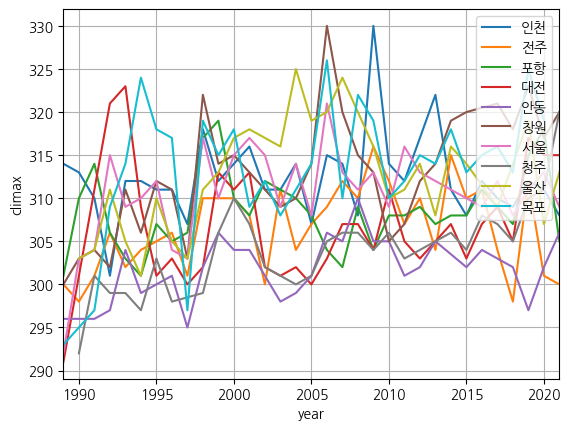

In [ ]:
# var = 'climax'

# plt.plot(inchon.year,inchon[var],label='인천')
# plt.plot(jeonju.year,jeonju[var],label='전주')
# plt.plot(pohang.year,pohang[var],label='포항')
# plt.plot(daejeon.year,daejeon[var],label='대전')
# plt.plot(andong.year,andong[var],label='안동')
# plt.plot(changwon.year,changwon[var],label='창원')
# plt.plot(seoul.year,seoul[var],label='서울')
# plt.plot(chungju.year,chungju[var],label='청주')
# plt.plot(ulsan.year,ulsan[var],label='울산')
# plt.plot(mokpo.year,mokpo[var],label='목포')
# plt.legend(loc='upper right')
# plt.xlim(1989,2021)
# plt.xlabel('year')
# plt.ylabel('climax')
# plt.grid()
# plt.show()

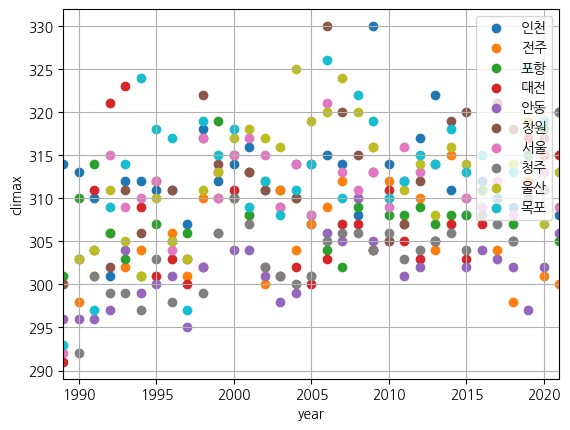

In [ ]:
# plt.scatter(inchon.year,inchon[var],label='인천')
# plt.scatter(jeonju.year,jeonju[var],label='전주')
# plt.scatter(pohang.year,pohang[var],label='포항')
# plt.scatter(daejeon.year,daejeon[var],label='대전')
# plt.scatter(andong.year,andong[var],label='안동')
# plt.scatter(changwon.year,changwon[var],label='창원')
# plt.scatter(seoul.year,seoul[var],label='서울')
# plt.scatter(chungju.year,chungju[var],label='청주')
# plt.scatter(ulsan.year,ulsan[var],label='울산')
# plt.scatter(mokpo.year,mokpo[var],label='목포')
# plt.legend(loc='upper right')
# plt.xlim(1989,2021)
# plt.xlabel('year')
# plt.ylabel('climax')
# plt.grid()
# plt.show()

In [ ]:
# cond = (df.month == 10) & (df.location == '상주')
# test = df[cond]
# test.head()

,location,year,month,lon,lat,height,avg_tem,precip,wind,min_tem,hPa,sun,g_tem,start,climax
6483,상주,2002,10,128.1574,36.4084,96.58,12.1,23.4,1.8,6.5,1006.1,187.7,12.6,286,302
6495,상주,2003,10,128.1574,36.4084,96.58,12.8,18.3,1.7,6.8,1006.6,234.3,14.0,285,297
6507,상주,2004,10,128.1574,36.4084,96.58,13.1,2.0,1.1,6.8,1008.9,203.1,15.5,291,301
6519,상주,2005,10,128.1574,36.4084,96.58,13.3,11.2,1.2,8.3,1008.1,126.6,14.8,291,303
6531,상주,2006,10,128.1574,36.4084,96.58,15.8,28.5,0.9,9.4,1007.5,196.7,18.4,297,304


In [ ]:
# result = pd.DataFrame(test[['location','climax']])

# def pred_date_lat(row):
#         return 284.6685 + (2.2208 * row.min_tem)

# result['Pred_date'] = test.apply(pred_date_lat,axis = 1)
# result['Error'] = result.climax - result.Pred_date

# # print(result.head())
# print(result.Error.min(),result.Error.max())

-2.7699400000000196 6.897580000000005


## 회귀식 적용가능 지역 선정

### 랜덤포레스트회귀(RFL)

In [ ]:
%matplotlib inline
import matplotlib
from matplotlib import style
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
style.use('seaborn-talk')

In [ ]:
krfont = {'family':'NanumGothic','weigth':'bold','size':10}

In [ ]:
test.head()

,location,year,month,lon,lat,height,avg_tem,precip,wind,min_tem,hPa,sun,g_tem,start,climax
6483,상주,2002,10,128.1574,36.4084,96.58,12.1,23.4,1.8,6.5,1006.1,187.7,12.6,286,302
6495,상주,2003,10,128.1574,36.4084,96.58,12.8,18.3,1.7,6.8,1006.6,234.3,14.0,285,297
6507,상주,2004,10,128.1574,36.4084,96.58,13.1,2.0,1.1,6.8,1008.9,203.1,15.5,291,301
6519,상주,2005,10,128.1574,36.4084,96.58,13.3,11.2,1.2,8.3,1008.1,126.6,14.8,291,303
6531,상주,2006,10,128.1574,36.4084,96.58,15.8,28.5,0.9,9.4,1007.5,196.7,18.4,297,304


In [ ]:
X = test.iloc[:,[9]].values
y = test.climax

In [ ]:
# rm = RandomForestRegressor(n_estimators=10,criterion='mse',random_state=1,n_jobs=-1)
# rm.fit(X,y)

C:\Java\miniconda3\envs\.py39\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', n_estimators=10, n_jobs=-1,
                      random_state=1)

In [ ]:
# pred = rm.predict(X)
# r2 = r2_score(y,pred)

In [ ]:
# plt.scatter(X, y, c='lightgray', label='단풍시기 데이터')
# plt.plot(X,pred, 'ro',label='tree,$R^2=%.2f$' %r2)
# plt.xlabel('data')
# plt.ylabel('julianday')
# plt.legend()
# plt.show()

## 전국 테스트

In [ ]:
df.head()

,location,year,month,lon,lat,height,avg_tem,precip,wind,min_tem,hPa,sun,g_tem,start,climax
0,속초,1989,1,128.5647,38.2509,17.53,1.5,165.9,2.8,-1.5,1023.7,111.6,0.8,286,297
1,속초,1989,2,128.5647,38.2509,17.53,2.7,65.3,2.6,-0.5,1022.4,154.2,1.9,286,297
2,속초,1989,3,128.5647,38.2509,17.53,5.9,121.7,3.2,2.6,1017.0,175.4,6.1,286,297
3,속초,1989,4,128.5647,38.2509,17.53,12.4,6.2,3.2,7.5,1013.3,228.1,14.2,286,297
4,속초,1989,5,128.5647,38.2509,17.53,16.5,66.8,3.5,12.5,1010.6,253.7,18.7,286,297


In [ ]:
df[cond]

,location,year,month,lon,lat,height,avg_tem,precip,wind,min_tem,hPa,sun,g_tem,start,climax
17389,구미,1989,9,128.3206,36.1306,49.17,19.6,163.0,1.0,15.3,1008.9,148.5,22.1,288,292
17401,구미,1990,9,128.3206,36.1306,49.17,20.2,219.3,1.0,16.2,1009.6,159.7,22.4,291,296
17413,구미,1991,9,128.3206,36.1306,49.17,19.8,117.9,1.0,15.4,1008.5,165.6,22.5,295,302
17425,구미,1992,9,128.3206,36.1306,49.17,19.6,113.7,1.0,14.7,1008.8,162.9,22.0,300,307
17437,구미,1993,9,128.3206,36.1306,49.17,18.9,83.0,1.0,13.2,1010.2,194.0,22.7,287,295
17449,구미,1994,9,128.3206,36.1306,49.17,20.1,3.0,1.4,13.0,1007.6,234.0,24.5,286,292
17461,구미,1995,9,128.3206,36.1306,49.17,18.9,77.0,1.2,13.6,1009.1,181.7,22.3,284,292
17473,구미,1996,9,128.3206,36.1306,49.17,20.4,30.3,0.7,14.8,1008.8,207.4,24.1,296,302
17485,구미,1997,9,128.3206,36.1306,49.17,20.0,26.0,0.7,14.3,1009.7,220.8,24.7,290,296
17497,구미,1998,9,128.3206,36.1306,49.17,21.8,320.0,0.9,17.1,1008.1,186.2,25.4,299,311


In [ ]:
cond = (df.month == 9) & (df.location == '구미')

df[cond].iloc[:, [6,14]].corr()

,avg_tem,climax
avg_tem,1.000000,0.534786
climax,0.534786,1.000000


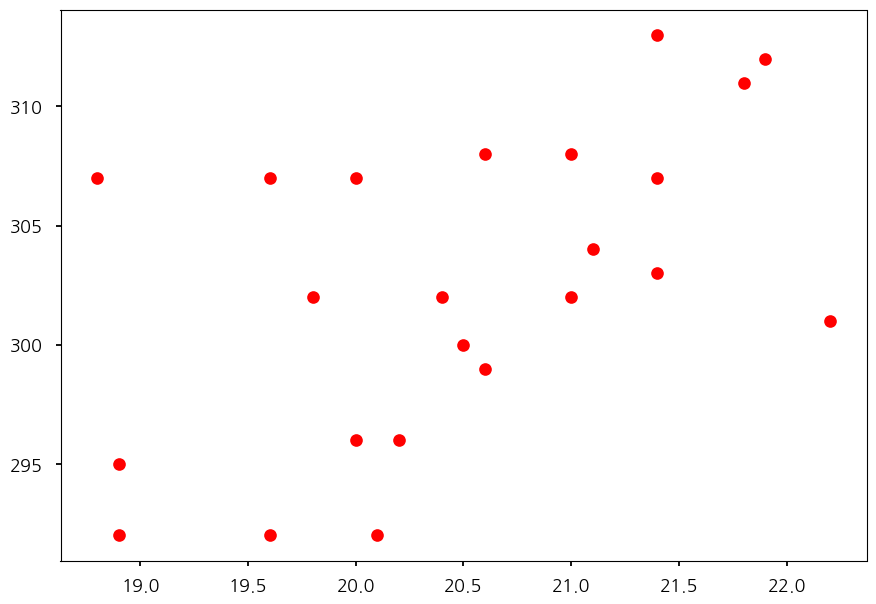

In [ ]:
X = df[cond].iloc[:,[6]]
y = df[cond].iloc[:,[14]]
plt.plot(X, y, 'ro')

In [ ]:
from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR

In [ ]:
df[cond].iloc[:, [6,14]].corr()

In [ ]:
cond = (df.month == 9) & (df.location == '상주')

X = df[cond].iloc[:,[6]]
y = df[cond].iloc[:,[14]]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3)

lr = LinearRegression()
# lr = SVR()

lr.fit(X_train,y_train)

pred = lr.predict(X_test)

r2_score(pred, y_test), np.sqrt(mean_squared_error(pred, y_test))

(-42.984563253930425, 4.130974008646327)

In [ ]:
cond = (df.month == 10) & (df.location == '구미')
# 제천, 천안, 구미, 산청, 추풍령,북춘천, 합천,영주,부안

test = df[cond]

X = test.iloc[:,[7]]
y = test.iloc[:,[14]]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.4, random_state=1)

forest = RandomForestRegressor(n_estimators=500,criterion='mse',n_jobs=-1)

forest.fit(X_train,y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

# plt.plot(X,forest.predict(X),'ro',label='랜덤 포레스트')

# plt.scatter(X_train, y_train, c='lightgray', label='트레이닝 데이터')
# plt.plot(X_test, y_test, 'bo', label='테스트 데이터')
# plt.show()

print('R2 - Train: %.3f, Test: %.3f' %(r2_train,r2_test))

print(np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred)))

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4348\4142866138.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Java\miniconda3\envs\.py39\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


R2 - Train: 0.873, Test: -2.214
2.171200306105074 9.150440798125514


In [ ]:
error = []
location = []

for i in range(len(lo)):    
    cond = df.location == f'{lo[i]}'

    pred = forest.predict(pd.DataFrame(df[cond].iloc[:,6]))
    location.append(lo[i])
    error.append(np.sqrt(mean_squared_error(pd.DataFrame(df[cond].iloc[:,14]),pred)))
dc = pd.DataFrame({'location':location,'error':error})
print(dc.error.mean(),dc.error.max())

In [ ]:
lo = ['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '홍성', '제주', '고산',
       '성산', '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천', '태백', '제천', '보은',
       '천안', '보령', '부여', '금산', '부안', '임실', '정읍', '남원', '장수', '고창군', '장흥',
       '해남', '고흥', '봉화', '영주', '문경', '영덕', '의성', '구미', '영천', '거창', '합천',
       '밀양', '산청', '거제', '남해']


In [ ]:
cols = ['precip', 'wind', 'min_tem', 'hPa', 'sun', 'g_tem', 'start']

In [ ]:
for c in range(len(cols)):
    locat = []
    er_mean = []
    er_max = []

    for i in range(len(lo)):
        cond = (df.month == 10) & (df.location == f'{lo[i]}')

        test = df[cond]

        X = test.iloc[:,[c+7]]
        y = test.climax

        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.4, random_state=1)

        forest = RandomForestRegressor(n_estimators=500,criterion='mse',n_jobs=-1)

        forest.fit(X_train,y_train)

        error = []
        location = []

        for j in range(len(lo)):    
            cond = (df.location == f'{lo[j]}')

            pred = forest.predict(pd.DataFrame(test.iloc[:,c+7]))
            location.append(lo[i])
            error.append(np.sqrt(mean_squared_error(pd.DataFrame(test.iloc[:,14]),pred)))
        dc = pd.DataFrame({'location':location,'error':error})

        locat.append(lo[i])
        er_mean.append(dc.error.mean())
        er_max.append(dc.error.max())
    pd.DataFrame({'location':lo,'er_mean':er_mean,'er_max':er_max}).to_csv(f'RFL/{cols[c]}_RFL.csv',encoding='cp949',index=False)

C:\Java\miniconda3\envs\.py39\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Java\miniconda3\envs\.py39\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Java\miniconda3\envs\.py39\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Java\miniconda3\envs\.py39\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Java\miniconda3\envs\.py39\lib\site-packages\sklearn\ensemble\_forest

In [ ]:
cond = (df.month == 10) & (df.location == f'{lo[i]}')

df[cond]

,location,year,month,lon,lat,height,avg_tem,precip,wind,min_tem,hPa,sun,g_tem,start,climax
18949,남해,1990,10,127.9264,34.8166,45.71,16.7,6.0,1.7,11.5,1021.5,244.0,20.5,307,315
18961,남해,1992,10,127.9264,34.8166,45.71,15.6,17.5,1.9,11.1,1014.6,233.1,16.6,311,322
18973,남해,1993,10,127.9264,34.8166,45.71,15.1,47.5,2.1,10.5,1015.2,205.8,16.3,313,319
18985,남해,1994,10,127.9264,34.8166,45.71,16.5,159.5,2.0,11.9,1014.4,215.3,18.0,316,327
18997,남해,1995,10,127.9264,34.8166,45.71,16.8,83.5,1.8,11.8,1014.5,232.6,16.6,314,318
19009,남해,1996,10,127.9264,34.8166,45.71,16.8,42.0,1.8,12.4,1014.3,205.4,17.5,316,322
19021,남해,1997,10,127.9264,34.8166,45.71,16.5,0.5,2.1,11.1,1013.7,242.2,17.8,309,315
19033,남해,1998,10,127.9264,34.8166,45.71,17.7,102.5,1.2,13.8,1013.3,216.6,18.4,310,322
19045,남해,1999,10,127.9264,34.8166,45.71,16.1,233.5,1.3,11.5,1015.2,177.3,17.4,312,330
19061,남해,2001,10,127.9264,34.8166,45.71,17.4,119.5,1.5,13.7,1014.1,191.5,19.0,312,322


In [ ]:
df.columns

Index(['location', 'year', 'month', 'lon', 'lat', 'height', 'avg_tem',
       'precip', 'wind', 'min_tem', 'hPa', 'sun', 'g_tem', 'start', 'climax'],
      dtype='object')

In [ ]:
evg_tem,precip,wind,min_tem,hPa,sun,g_tem,start

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [ ]:
X = np.array(total4.start)
y = np.array(total4.climax)

In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
LR.fit(X_train,y_train)

In [ ]:
LR.coef_,LR.intercept_

In [ ]:
plt.scatter(X_test,y_test)
plt.scatter(X_train,y_train
plt.plot(X,LR.coef_*X+LR.intercept_,'r--')
plt.show()

In [ ]:
print(np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred)))

In [ ]:
plt.scatter(total4.start,total4.climax)
plt.show()